In [1]:
# Libraries
from waveome.model_search import GPKernelSearch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#pip install tensorflow

In [3]:
#pip install tensorflow_probability

In [4]:
#pip install gpflow

In [5]:
metadata = pd.read_csv(r"C:\Users\ASUS\Box\Waveome\data\Marine_microbiome\metadata.csv")
microbiome = pd.read_csv(r"C:\Users\ASUS\Box\Waveome\data\Marine_microbiome\microbiome.csv")
outcomes = microbiome.iloc[:,3:]
#print(outcomes.iloc[:, 1:5])

In [6]:
df = pd.DataFrame(
    {
        'sample_id': metadata['Sample_Id'],
        'sample_name': metadata['Sample_name'],
        'depth' : metadata['depth_(m)'],
        'time': metadata['Time'],
        'chemistry': metadata['chemistry'],
    }
).sort_values(['sample_id', 'time'])

for col  in outcomes.iloc[:,1:10]:
    df[col] = outcomes[col]

print(f'Dimension of dataset: {df.shape}')

df.head()

Dimension of dataset: (42, 14)


,sample_id,sample_name,depth,time,chemistry,Acanthamoeba_polyphaga_mimivirus,Acanthocystis_turfacea_Chlorella_virus_1,Acaryochloris,Acaryochloris_marina_MBIC11017,Acetivibrio_cellulolyticus_CD2,Acetobacter,Acetobacter_aceti_NBRC_14818,Acetobacter_pomorum_DM001,Acetobacter_tropicalis_NBRC_101654
0,1,HOT194_25m,25,0,flex,39,8,15,43,31,28,38,11,50
1,2,HOT195_25m,25,30,flex,51,11,13,31,25,17,41,13,34
2,3,HOT196_25m,25,57,flex,15,4,16,18,10,13,14,3,13
3,4,HOT197_25m,25,117,flex,54,20,18,38,24,21,18,10,23
4,5,HOT198_25m,25,136,flex,27,15,23,26,25,22,32,20,31


In [7]:
column_names = df.columns.tolist()
print(column_names[5:])

['Acanthamoeba_polyphaga_mimivirus', 'Acanthocystis_turfacea_Chlorella_virus_1', 'Acaryochloris', 'Acaryochloris_marina_MBIC11017', 'Acetivibrio_cellulolyticus_CD2', 'Acetobacter', 'Acetobacter_aceti_NBRC_14818', 'Acetobacter_pomorum_DM001', 'Acetobacter_tropicalis_NBRC_101654']


In [8]:
x = (df.loc[:, 'time'])

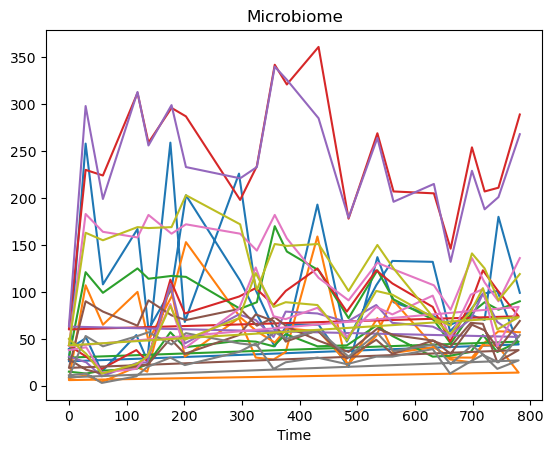

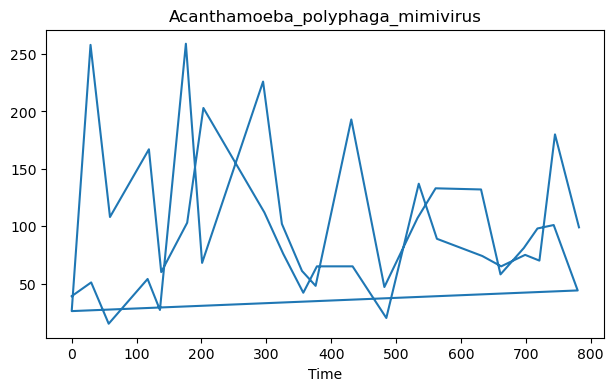

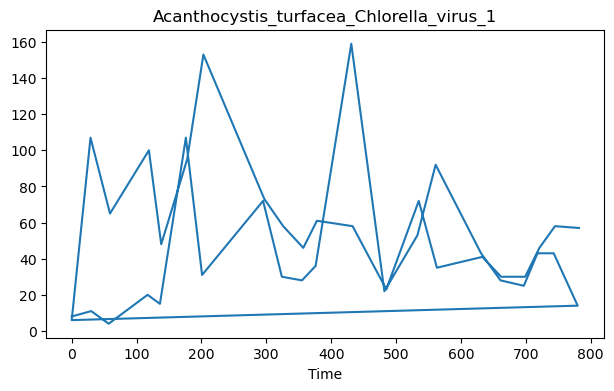

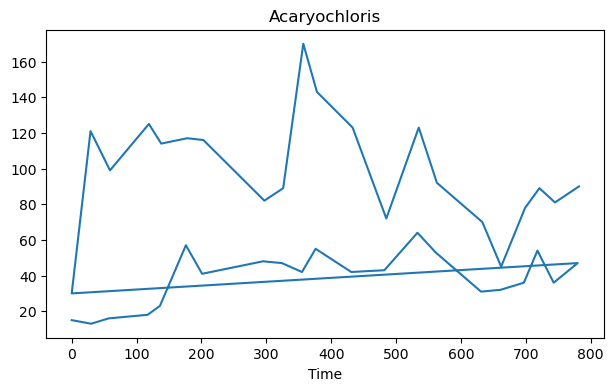

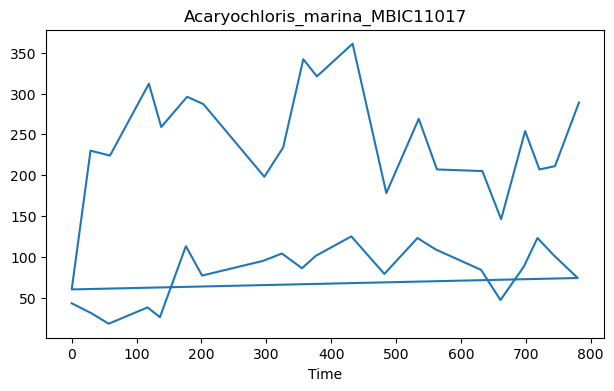

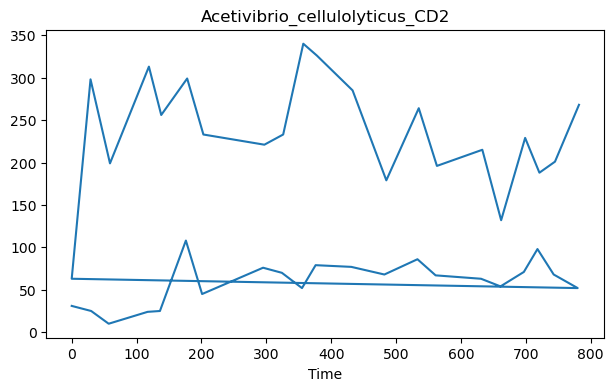

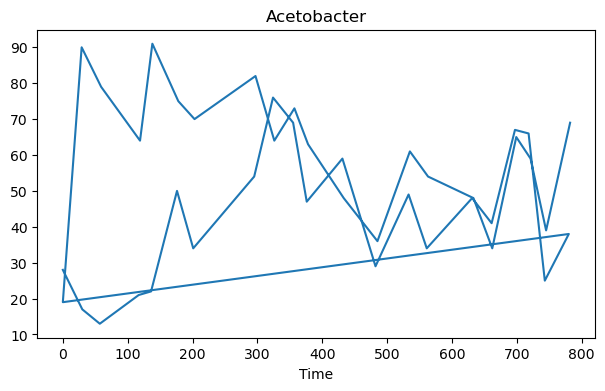

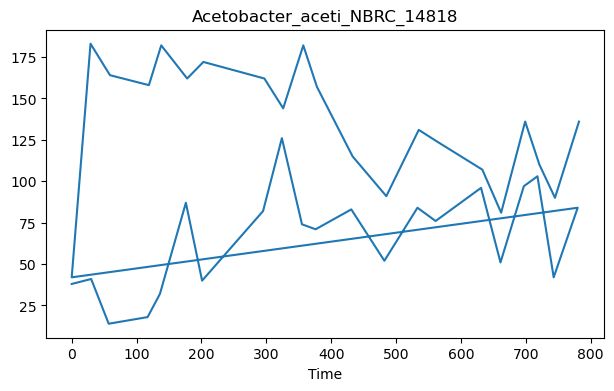

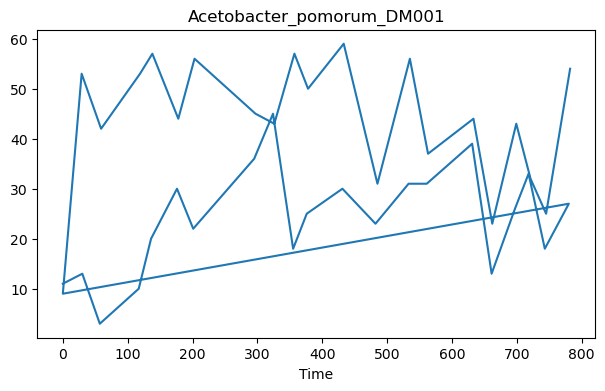

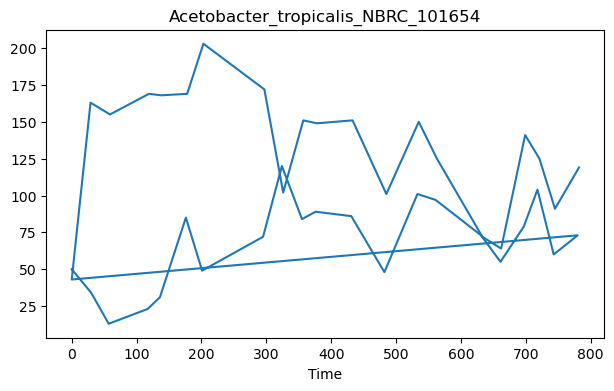

In [9]:
'''for i in outcomes:
    plt.plot(df.loc[:, 'time'], df.loc[:, i])
    plt.title(i)
    plt.xlabel('Time')
    plt.figure(figsize=(7.2,3.6))
'''
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

for i in df.iloc[:, 5:]:
    plt.plot(df.loc[:,'time'], df.loc[:, i])
plt.title('Microbiome')
plt.xlabel('Time')
plt.savefig(os.path.join(save_dir, 'Microbiome.png'))

for i in df.iloc[:, 5:]:
    plt.figure(figsize=(7.2,4))
    plt.plot(df.loc[:,'time'], df.loc[:, i])
    plt.title(i)
    plt.xlabel('Time')
    plt.savefig(os.path.join(save_dir, f'{i}.png'))
    plt.show()

In [10]:
# Factorize categorical columns
df["sample_id"], subject_vals = pd.factorize(df["sample_id"])
df["depth"], subject_vals = pd.factorize(df["depth"])
df["chemistry"], chemistry = pd.factorize(df["chemistry"])
df[["sample_id", "depth", "time", "chemistry"]] = df[["sample_id", "depth", "time", "chemistry"]].astype(float)

In [11]:
X = df[['sample_id', 'depth', 'time', 'chemistry']]
X.head()

,sample_id,depth,time,chemistry
0,0.0,0.0,0.0,0.0
1,1.0,0.0,30.0,0.0
2,2.0,0.0,57.0,0.0
3,3.0,0.0,117.0,0.0
4,4.0,0.0,136.0,0.0


In [12]:
df[column_names[5:]] = df[column_names[5:]].astype(float)
Y = df[column_names[5:]]
Y.head()

,Acanthamoeba_polyphaga_mimivirus,Acanthocystis_turfacea_Chlorella_virus_1,Acaryochloris,Acaryochloris_marina_MBIC11017,Acetivibrio_cellulolyticus_CD2,Acetobacter,Acetobacter_aceti_NBRC_14818,Acetobacter_pomorum_DM001,Acetobacter_tropicalis_NBRC_101654
0,39.0,8.0,15.0,43.0,31.0,28.0,38.0,11.0,50.0
1,51.0,11.0,13.0,31.0,25.0,17.0,41.0,13.0,34.0
2,15.0,4.0,16.0,18.0,10.0,13.0,14.0,3.0,13.0
3,54.0,20.0,18.0,38.0,24.0,21.0,18.0,10.0,23.0
4,27.0,15.0,23.0,26.0,25.0,22.0,32.0,20.0,31.0


In [13]:
# Load the information into the Gaussian process search object
gps = GPKernelSearch(
    X=df[['sample_id','depth', 'time', 'chemistry']],
    Y=df[column_names[5:]],
    unit_col= 'sample_id',
    categorical_vars=['depth', 'chemistry'],
    outcome_likelihood='gaussian'
)

In [14]:
gps.run_search(
    random_seed= 5
)

Kernel search: 100%|██████████| 9/9 [14:41<00:00, 97.97s/it]


In [15]:
gps.models['Acanthamoeba_polyphaga_mimivirus']

{'models': {'categorical[0]+categorical[3]+squared_exponential[2]+categorical[1]*squared_exponential[2]': {'kernel': <gpflow.kernels.base.Sum object at 0x000001EC81B7CFD0>
╒════════════════════════════════════════╤═══════════╤═════════════╤═════════╤═════════════╤═════════╤═════════╤══════════╕
│ name                                   │ class     │ transform   │ prior   │ trainable   │ shape   │ dtype   │    value │
╞════════════════════════════════════════╪═══════════╪═════════════╪═════════╪═════════════╪═════════╪═════════╪══════════╡
│ Sum.kernels[0].variance                │ Parameter │ Softplus    │ Uniform │ True        │ ()      │ float64 │ 95.7951  │
├────────────────────────────────────────┼───────────┼─────────────┼─────────┼─────────────┼─────────┼─────────┼──────────┤
│ Sum.kernels[1].variance                │ Parameter │ Softplus    │ Uniform │ True        │ ()      │ float64 │ 72.5029  │
├────────────────────────────────────────┼───────────┼─────────────┼─────────┼──────

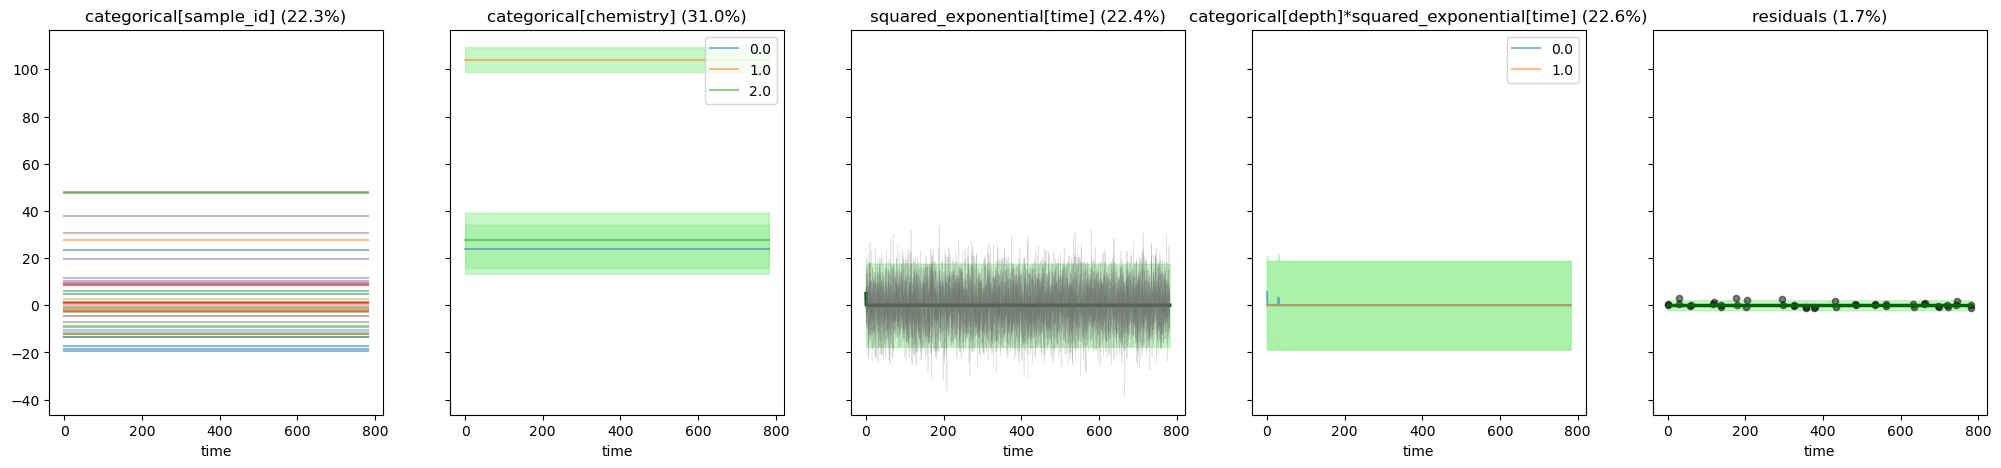

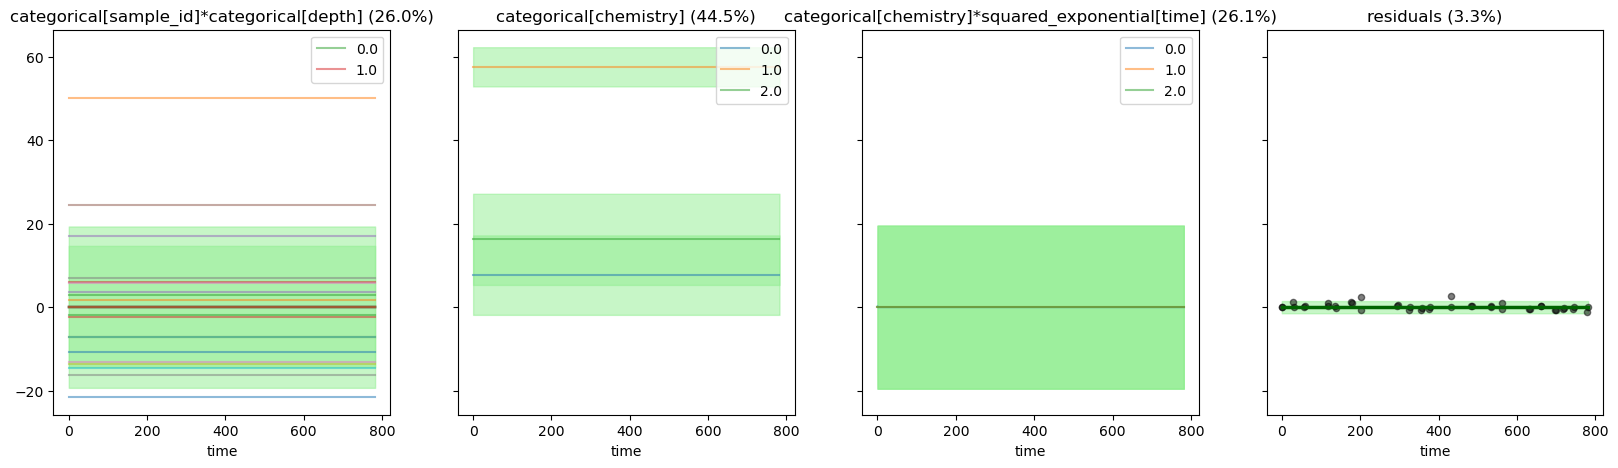

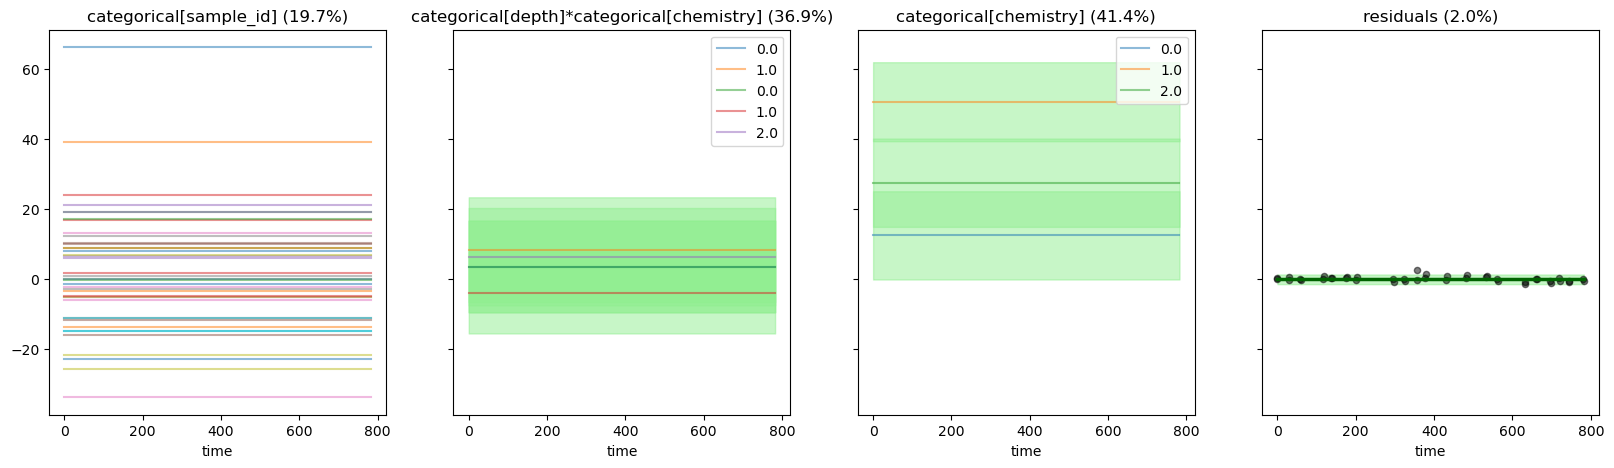

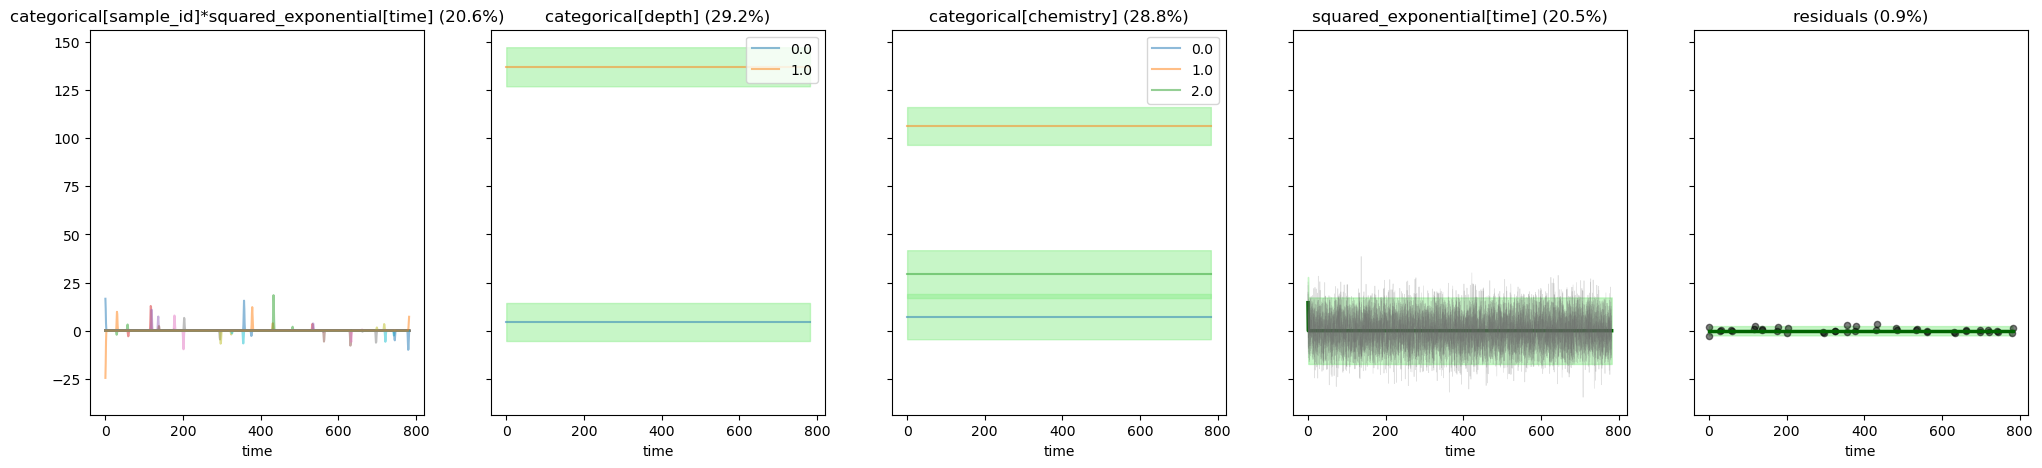

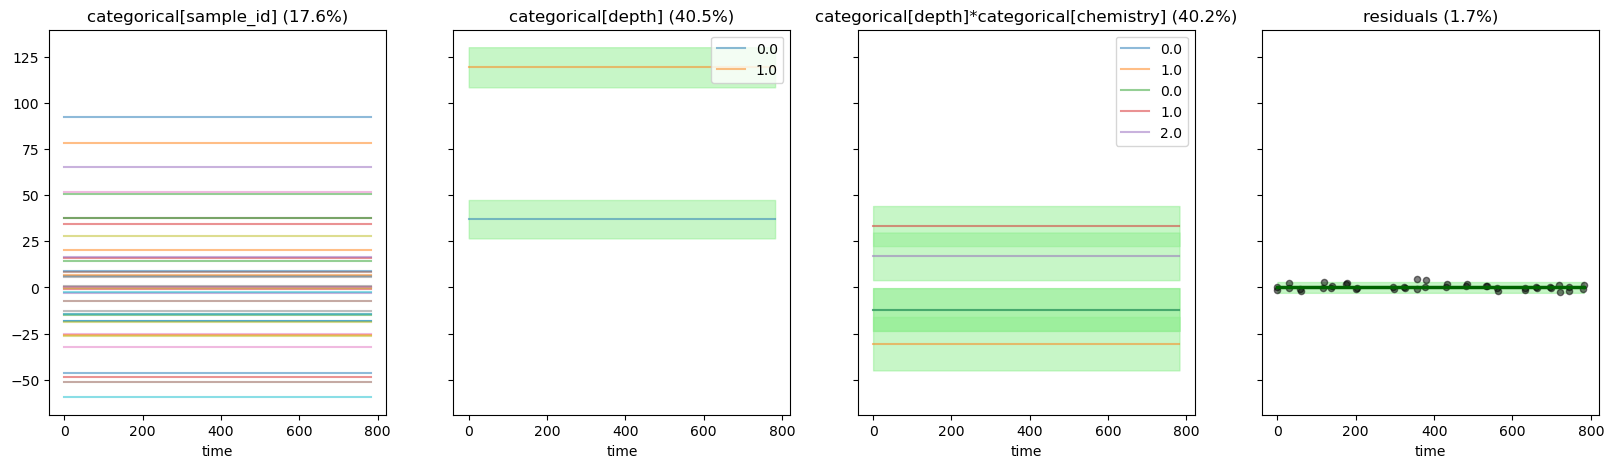

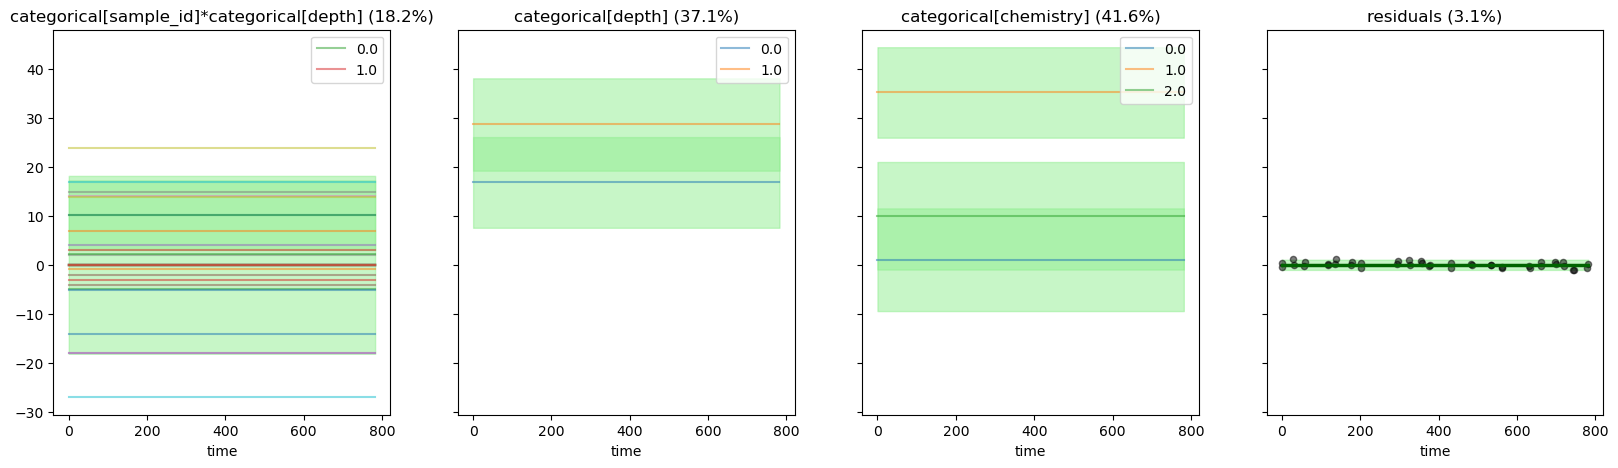

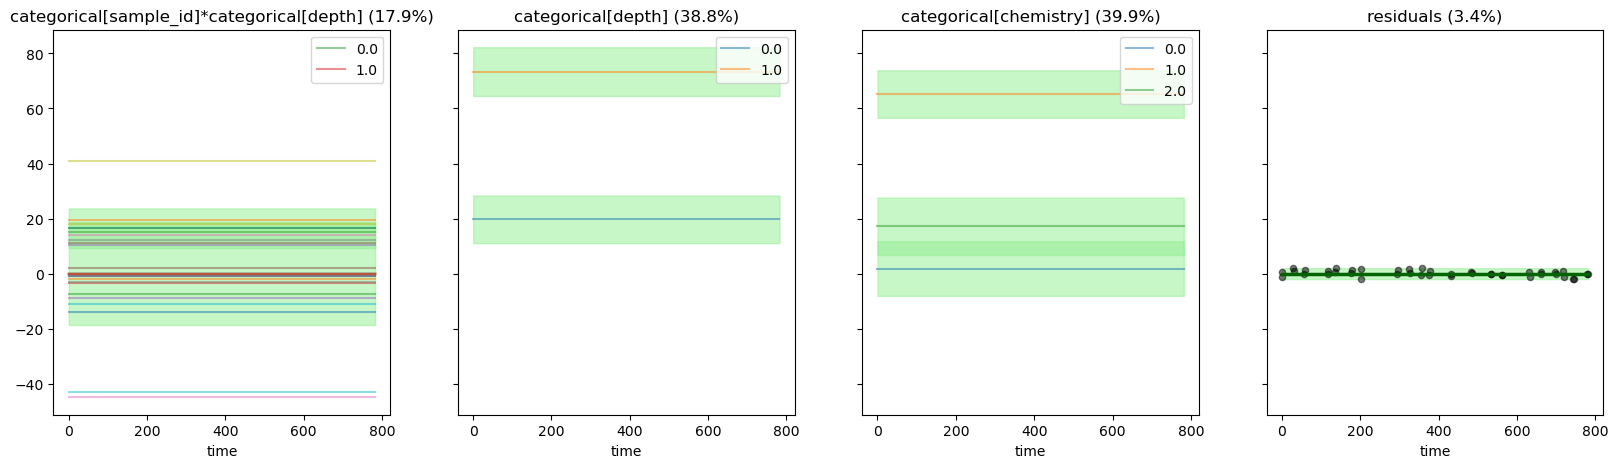

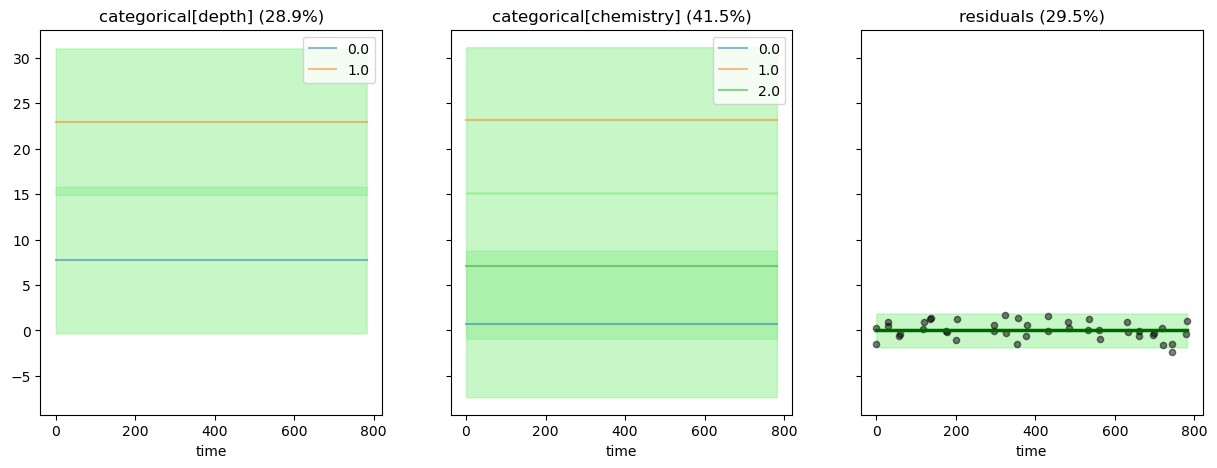

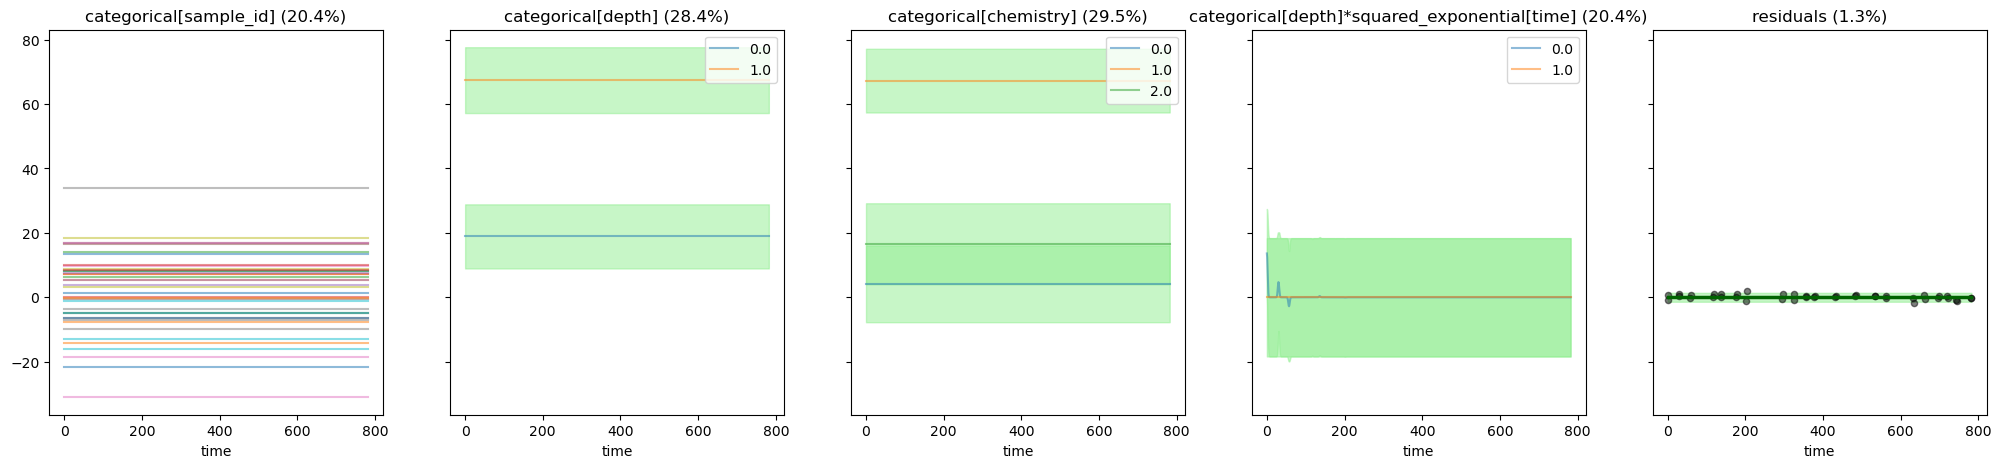

In [16]:
# Now after the search is finished we can inspect the
# additive components selected for each outcome
'''gps.plot_parts(
    out_label='outcome1',
    x_axis_label='time'
);
'''
save_dir = 'figures'
os.makedirs(save_dir, exist_ok=True)

for i in df.iloc[:, 5:]:
    gps.plot_parts(
        out_label=i,
        x_axis_label='time',
    )
    plt.savefig(os.path.join(save_dir, f'Parts_plot_{i}.png'))

In [17]:
'''gps.plot_parts(
    out_label='Acanthamoeba_polyphaga_mimivirus',
    x_axis_label='time'
)
plt.savefig(os.path.join(save_dir, 'Parts_plot_Acanthamoeba_polyphaga_mimivirus.png'))'''

"gps.plot_parts(\n    out_label='Acanthamoeba_polyphaga_mimivirus',\n    x_axis_label='time'\n)\nplt.savefig(os.path.join(save_dir, 'Parts_plot_Acanthamoeba_polyphaga_mimivirus.png'))"

In [18]:
'''gps.plot_parts(
    out_label='outcome3',
    x_axis_label='time'
);'''

"gps.plot_parts(\n    out_label='outcome3',\n    x_axis_label='time'\n);"

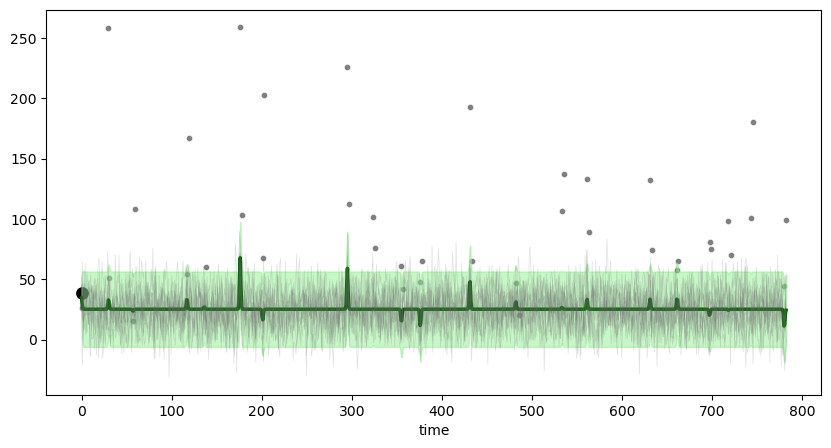

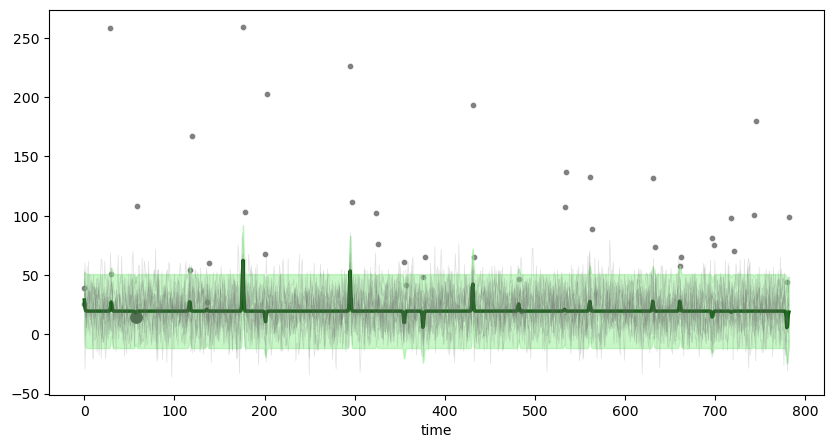

In [19]:
# Plot some of the posterior mean functions for individuals in the dataset
# This is done with the unit_label argument
gps.plot_marginal(
    out_label='Acanthamoeba_polyphaga_mimivirus',
    x_axis_label='time',
    unit_label=0
)
plt.savefig(os.path.join(save_dir, f'Marginal_plot_Acanthamoeba_polyphaga_mimivirus.png'))

gps.plot_marginal(
    out_label='Acanthamoeba_polyphaga_mimivirus',
    x_axis_label='time',
    unit_label=2
)
plt.savefig(os.path.join(save_dir, f'Marginal_plot2_Acanthamoeba_polyphaga_mimivirus.png'))

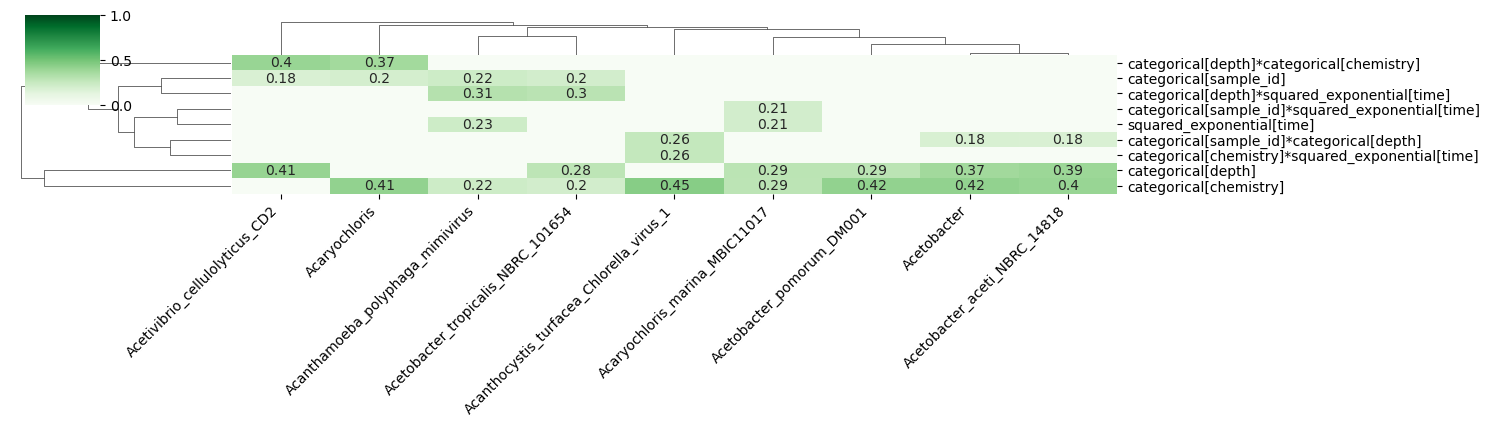

In [20]:
gps.plot_heatmap(var_cutoff=0.1);
plt.savefig(os.path.join(save_dir, 'Heatmap.png'))